# **Taller 1 Introduccion a las Redes Neuronales INF-395**
*   Felipe Cisternas, 201873022-K
*   Lucas Galindo, 201873004-1





# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import seaborn as sns; sns.set()
import PIL #libreria de manejo de imagenes
import os #listdirs
from sklearn.preprocessing import StandardScaler

# Pregunta 1:

> **4. Approximación Universal**: Añadiendo un número suficientemente grande de neuronas a una red clásica de 3 capas, es posible obtener siempre error 0 en problemas de regresión.




Para poder responder esta pregunta vamos a tomar la hipotesis nula, que consiste en negar la hipotesis planteada, por ende trabajaremos con la hipotesis de que no es posible obtener error 0 en problemas de regresion añadiendo un número suficientemente grande de neuronas a una red clásica de 3 capas, 

---


al final con los resultados comprobaremos si esta hipotesis nula es verdadera o no.





Para la pregunta 1 hay que bajar los datasets de las url que se dejan mas abajo o de la entrega de aula y subirlos al entorno de ejecucion de google colab

In [ ]:
#https://www.kaggle.com/andonians/random-linear-regression dataset sintetico 1
#https://www.kaggle.com/harlfoxem/housesalesprediction Dataset Real 1
#https://www.kaggle.com/mirichoi0218/insurance Dataset Real 2

sintetic_data_1 = pd.read_csv('/content/Linear Regression - Sheet1.csv') #dataset 1
real_data_1 = pd.read_csv('/content/kc_house_data.csv') #dataset 1
real_data_2 = pd.read_csv('/content/insurance.csv') #dataset 1

In [ ]:
sintetic_data_1.dropna()
sintetic_data_1

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


In [ ]:
#SD1 = Sintetic Dataset 1
X_SD1 = sintetic_data_1[['X']]
Y_SD1 = sintetic_data_1[['Y']]

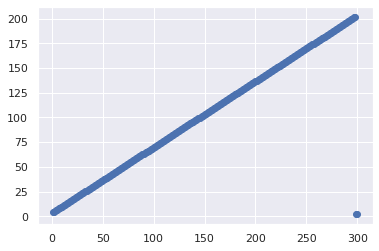

In [ ]:
plt.scatter(X_SD1, Y_SD1)

In [ ]:
print(X_SD1.shape)
print(Y_SD1.shape)

(300, 1)
(300, 1)


In [ ]:
X_train_SD1, X_val_SD1, y_train_SD1, y_val_SD1 = train_test_split(X_SD1, Y_SD1, test_size=0.2, random_state=0)

In [ ]:
real_data_1.dropna()
real_data_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
#RD1 = Real Dataset 1
X_RD1 = real_data_1[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode']]
Y_RD1 = real_data_1[['price']]

[]

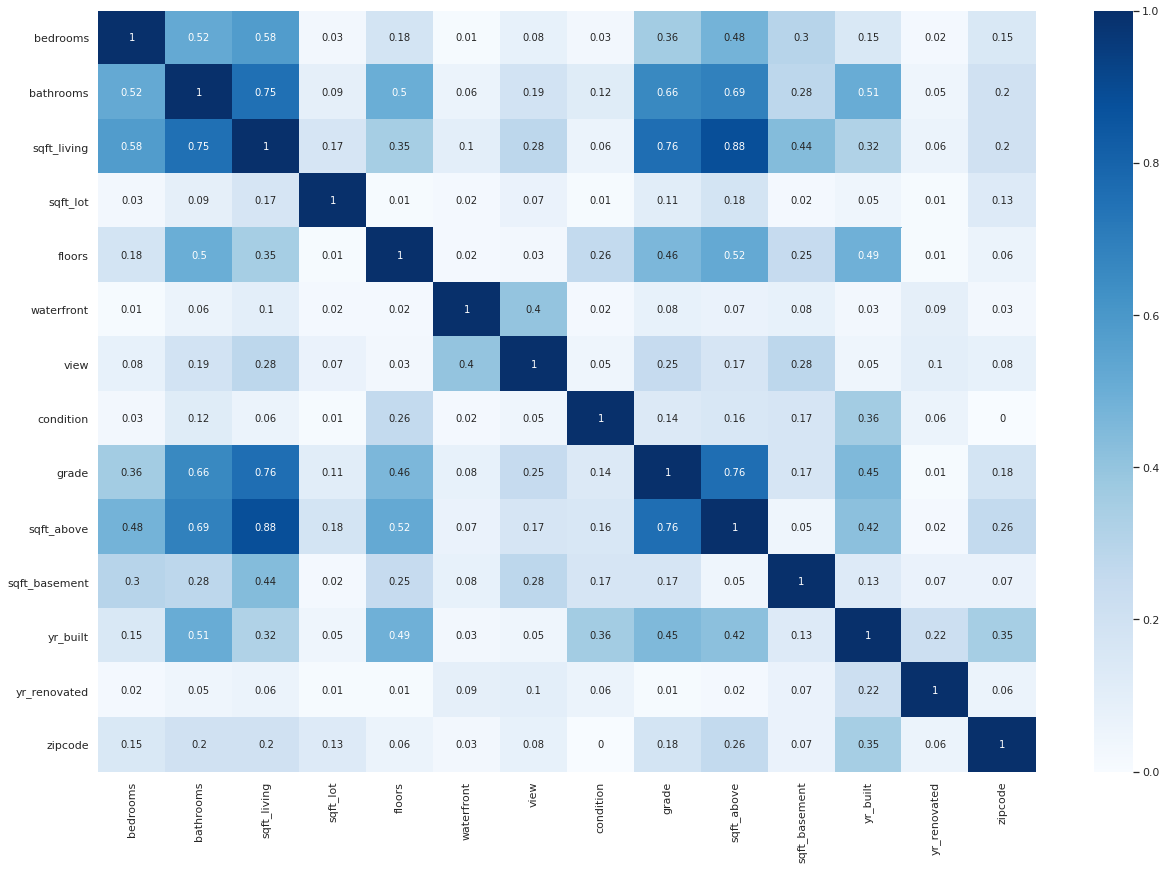

In [ ]:
fig = plt.figure(figsize=(21,14))
sns.heatmap(data=X_RD1.corr().round(2).abs(), annot=True, cmap=plt.cm.Blues)
plt.plot()

In [ ]:
print(X_RD1.shape)
print(Y_RD1.shape)

(21613, 14)
(21613, 1)


In [ ]:
X_train_RD1, X_val_RD1, y_train_RD1, y_val_RD1 = train_test_split(X_RD1, Y_RD1, test_size=0.2, random_state=0)

In [ ]:
real_data_2.dropna()
real_data_2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
sex = pd.get_dummies(real_data_2[['sex']])
smoker = pd.get_dummies(real_data_2[['smoker']])
region = pd.get_dummies(real_data_2[['region']])

real_data_2[['female','male']] = sex
real_data_2[['smoker_no','smoker_yes']] = smoker
real_data_2[['northeast','northwest','southeast','southwest']] = region

In [ ]:
#RD2 = Real Dataset 2
X_RD2 = real_data_2[['age','bmi','children','female','male','smoker_no','smoker_yes','northeast','northwest','southeast','southwest']]
Y_RD2 = real_data_2[['charges']]

[]

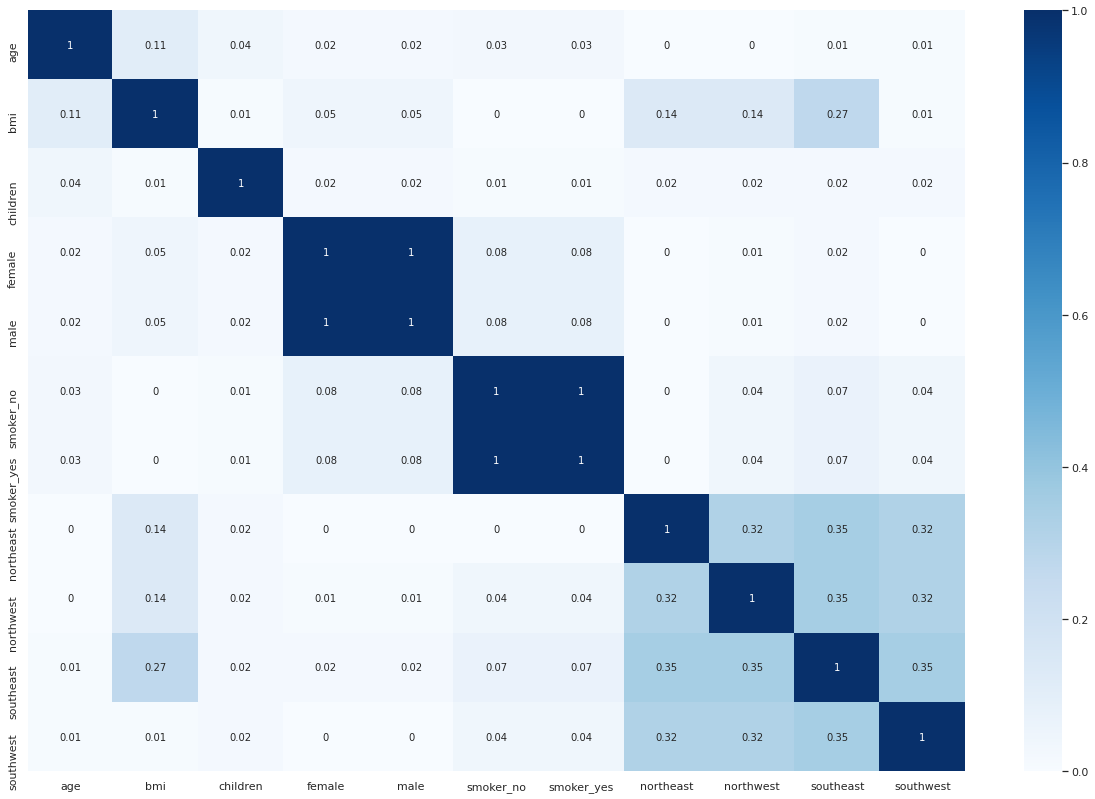

In [ ]:
fig = plt.figure(figsize=(21,14))
sns.heatmap(data=X_RD2.corr().round(2).abs(), annot=True, cmap=plt.cm.Blues)
plt.plot()

In [ ]:
print(X_RD2.shape)
print(Y_RD2.shape)

(1338, 11)
(1338, 1)


In [ ]:
X_train_RD2, X_val_RD2, y_train_RD2, y_val_RD2 = train_test_split(X_RD2, Y_RD2, test_size=0.2, random_state=0)

In [ ]:
ds_list_x=[X_train_SD1,X_train_RD1,X_train_RD2]
ds_list_y=[y_train_SD1,y_train_RD1,y_train_RD2]

ds_val_x=[X_val_SD1,X_val_RD1,X_val_RD2]
ds_val_y=[y_val_SD1,y_val_RD1,y_val_RD2]

Cambiar el parametro Dataset_entrenar para entrenar los distintos datasets

In [ ]:
Dataset_entrenar = 2 #cambiar el numero por el dataset que se requiera, 0=SD1, 1=RD1, 2=RD2

n_features:  11
n_classes:  1
Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (InputLayer)          [(None, 11)]              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100000)            1200000   
_________________________________________________________________
Output (Dense)               (None, 1)                 100001    
Total params: 1,300,001
Trainable params: 1,300,001
Non-trainable params: 0
_________________________________________________________________


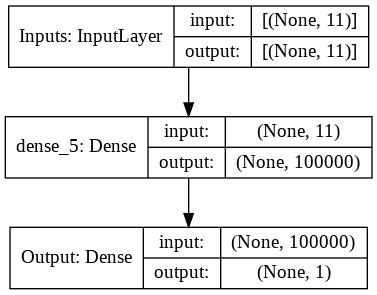

In [ ]:
n_features = ds_list_x[Dataset_entrenar].shape[1]
n_classes = ds_list_y[Dataset_entrenar].shape[1]

print("n_features: ", n_features)
print("n_classes: ", n_classes)

inputs = keras.Input(shape=(n_features, ), name='Inputs')
x = layers.Dense(100000, activation='relu')(inputs)
outputs = layers.Dense(n_classes, activation='linear', name='Output')(x)
 
model2 = keras.Model(inputs=inputs, outputs=outputs, name='Regression')
model2.summary()

keras.utils.plot_model(model2, show_shapes=True)

Ejemplos de entrenamiento: 1070
Epoch 1/200
34/34 - 0s - loss: 68316384.0000 - val_loss: 66016468.0000
Epoch 2/200
34/34 - 0s - loss: 61291756.0000 - val_loss: 58375496.0000
Epoch 3/200
34/34 - 0s - loss: 55489912.0000 - val_loss: 51182356.0000
Epoch 4/200
34/34 - 0s - loss: 50773552.0000 - val_loss: 45887180.0000
Epoch 5/200
34/34 - 0s - loss: 46975676.0000 - val_loss: 43374084.0000
Epoch 6/200
34/34 - 0s - loss: 44619672.0000 - val_loss: 39554160.0000
Epoch 7/200
34/34 - 0s - loss: 42767160.0000 - val_loss: 37059044.0000
Epoch 8/200
34/34 - 0s - loss: 40513648.0000 - val_loss: 34724828.0000
Epoch 9/200
34/34 - 0s - loss: 39169936.0000 - val_loss: 33846100.0000
Epoch 10/200
34/34 - 0s - loss: 38569960.0000 - val_loss: 33094916.0000
Epoch 11/200
34/34 - 0s - loss: 38343748.0000 - val_loss: 32599376.0000
Epoch 12/200
34/34 - 0s - loss: 38193760.0000 - val_loss: 31791390.0000
Epoch 13/200
34/34 - 0s - loss: 37305508.0000 - val_loss: 33235964.0000
Epoch 14/200
34/34 - 0s - loss: 37405700.

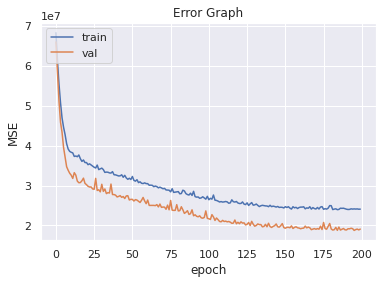

In [ ]:
# Compilar el modelo.  utilizando mean squared error
 
model2.compile(loss='mse', optimizer='adam')
 
_batch_size = 32 # Numero de ejemplos por gradient update.
         
print("Ejemplos de entrenamiento: {n_t}".format(n_t = ds_list_x[Dataset_entrenar].shape[0] ) )
 
 
# Entrenar modelo
history = model2.fit(
    x = ds_list_x[Dataset_entrenar],
    y = ds_list_y[Dataset_entrenar],
    batch_size=_batch_size,
    epochs=200,
    verbose=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(ds_val_x[Dataset_entrenar], ds_val_y[Dataset_entrenar]),
)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error Graph')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Como se puede observar al entrenar los multiples Datasets, ninguno puede obtener error 0 aunque tengamos muchas neuronas con una red de 3 capas, de hecho en algunos casos al tener muchas capas el modelo comienza a aumetar la loss, en vez de disminuirlo.

---

Otro punto es que si lograramos obtener error 0 al momento de entrenar la red esto generaria Overfitting y nuestra red no serviria mas que para esos datos en especifico, no funcionaria en un problema real


---

Estos resultados afirman la hipotesis nula que planteamos al principio, como esta hipotesis es la negacion de la hiptesis de la pregunta original, tenemos que descartar la hipotesis original, por ende no se puede obtener error 0 en problemas de regresion añadiendo un número suficientemente grande de neuronas a una red clásica de 3 capas


# Pregunta 2:

In [ ]:
!wget  http://www.inf.utfsm.cl/~jnancu/fotos-casas.zip
!unzip fotos-casas.zip 
!wget  http://www.inf.utfsm.cl/~jnancu/metadata_casas_test.csv
!wget  http://www.inf.utfsm.cl/~jnancu/metadata_casas_train.csv

!ls

--2021-06-24 22:05:57--  http://www.inf.utfsm.cl/~jnancu/fotos-casas.zip
Resolving www.inf.utfsm.cl (www.inf.utfsm.cl)... 200.1.19.11, 2800:270:c::11
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.inf.utfsm.cl/~jnancu/fotos-casas.zip [following]
--2021-06-24 22:05:58--  https://www.inf.utfsm.cl/~jnancu/fotos-casas.zip
Connecting to www.inf.utfsm.cl (www.inf.utfsm.cl)|200.1.19.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186835246 (178M) [application/zip]
Saving to: ‘fotos-casas.zip’

fotos-casas.zip     100%[===================>] 178.18M  20.0MB/s    in 9.7s    

2021-06-24 22:06:08 (18.4 MB/s) - ‘fotos-casas.zip’ saved [186835246/186835246]

Archive:  fotos-casas.zip
   creating: fotos-casas/
  inflating: fotos-casas/TF1TNGSSC5BCHBG_kitchen.jpg  
   creating: __MACOSX/
   creating: __MACOSX/fotos-casas/
  inflating: __MACOSX/fotos-casas/._TF1TNGSSC5B

In [ ]:
_data_train = dict()
_data_file_path = 'metadata_casas_train.csv'
f = open(_data_file_path, 'r')
for line in f:
    _,cod_casa,_,_,_,_,precio = line.strip().split(',')
    _data_train[cod_casa] = [precio]
f.close()
del _data_train['cod_casa']

_data_test = dict()
_data_file_path = 'metadata_casas_test.csv'
f = open(_data_file_path, 'r')
for line in f:
    cod_casa = line.strip().split(',')[1]
    _data_test[cod_casa] = dict()
del _data_test['cod_casa']
f.close()

In [ ]:
photo_dir = 'fotos-casas'
for f in os.listdir(photo_dir):
    # hacemos que todas las imagenes tengan el mismo tamaño y las pasamos a escala de gris
    I = PIL.Image.open('/'.join([photo_dir, f])).resize((100,100)).convert('L')
    house_id, room = f.strip()[:-4].split('_')
    if house_id in _data_train:
        if len(_data_train[house_id]) == 1:
            _data_train[house_id].append(dict())
        _data_train[house_id][1][room] = np.asarray(I)
    elif house_id in _data_test:
        _data_test[house_id][room] = np.asarray(I)
    I.close()

In [ ]:
_data_train

{'02TSHVPNTVWBR5J': ['249900',
  {'bathroom': array([[117, 110, 113, ...,  95, 101, 106],
          [111, 113, 116, ..., 101,  80,  89],
          [110, 111, 116, ...,  95,  79, 100],
          ...,
          [ 41,  31,  13, ..., 118, 109, 102],
          [ 45,  53,  10, ..., 100, 103, 103],
          [ 41,  43,  16, ...,  99, 102, 104]], dtype=uint8),
   'bedroom': array([[112, 112, 112, ...,  72,  71,  69],
          [108, 109, 108, ...,  73,  71,  71],
          [106, 108, 103, ...,  74,  73,  72],
          ...,
          [ 33,  49,  45, ...,  75,  60,  56],
          [ 59,  63,  55, ...,  46,  42,  64],
          [ 61,  57,  59, ...,  52,  47,  61]], dtype=uint8),
   'frontal': array([[144, 144, 142, ..., 136, 137, 136],
          [145, 145, 144, ..., 138, 137, 137],
          [147, 145, 146, ..., 138, 138, 138],
          ...,
          [124, 122, 134, ..., 139, 141, 117],
          [115, 117, 130, ..., 115, 133, 124],
          [124, 117, 119, ..., 146, 142, 135]], dtype=uint8),

In [ ]:
_data_test = list(_data_test.values())
Xt_bed = []
Xt_bath = []
Xt_k = []
Xt_f = []
for rooms in _data_test:
    Xt_bed.append(rooms['bedroom'])
    Xt_bath.append(rooms['bathroom'])
    Xt_f.append(rooms['frontal'])
    Xt_k.append(rooms['kitchen'])

In [ ]:
Xt_bed = np.array(Xt_bed).reshape(92,100,100,1)
Xt_bath = np.array(Xt_bath).reshape(92,100,100,1)
Xt_k = np.array(Xt_k).reshape(92,100,100,1)
Xt_f = np.array(Xt_f).reshape(92,100,100,1)

In [ ]:
Xt_bed.shape

(92, 100, 100, 1)

In [ ]:
_data_train = list(_data_train.values())
XT_bed = []
XT_bath = []
XT_k = []
XT_f = []
for _,rooms in _data_train:
    XT_bed.append(rooms['bedroom'])
    XT_bath.append(rooms['bathroom'])
    XT_f.append(rooms['frontal'])
    XT_k.append(rooms['kitchen'])
    
Y_train = np.array([[int(price)] for price,_ in _data_train])
XT_bed = np.array(XT_bed).reshape(443,100,100,1)
XT_bath = np.array(XT_bath).reshape(443,100,100,1)
XT_k = np.array(XT_k).reshape(443,100,100,1)
XT_f = np.array(XT_f).reshape(443,100,100,1)

In [ ]:
_validation_split = 0.2

In [ ]:
XT_bed, XV_bed = train_test_split(XT_bed, test_size=_validation_split, random_state=0)
XT_bath, XV_bath = train_test_split(XT_bath, test_size=_validation_split, random_state=0)
XT_k, XV_k = train_test_split(XT_k, test_size=_validation_split, random_state=0)
XT_f, XV_f = train_test_split(XT_f, test_size=_validation_split, random_state=0)

In [ ]:
data_train = pd.read_csv('metadata_casas_train.csv')

data_train.dropna()

print(data_train.head(5))

   Unnamed: 0         cod_casa  habitaciones  banos  area  zipcode  precio
0           0  OC4U9J6C11R5715             4    4.0  4053    85255  869500
1           1  CQF44W2LE3S3NSC             4    3.0  3343    36372  865200
2           2  LT2Z9MOPF5KIM7T             3    4.0  3923    85266  889000
3           3  VUCNPXL2QMIA22A             5    5.0  4022    85262  910000
4           4  9CWP6T0SBBLGDBL             3    4.0  4116    85266  971226


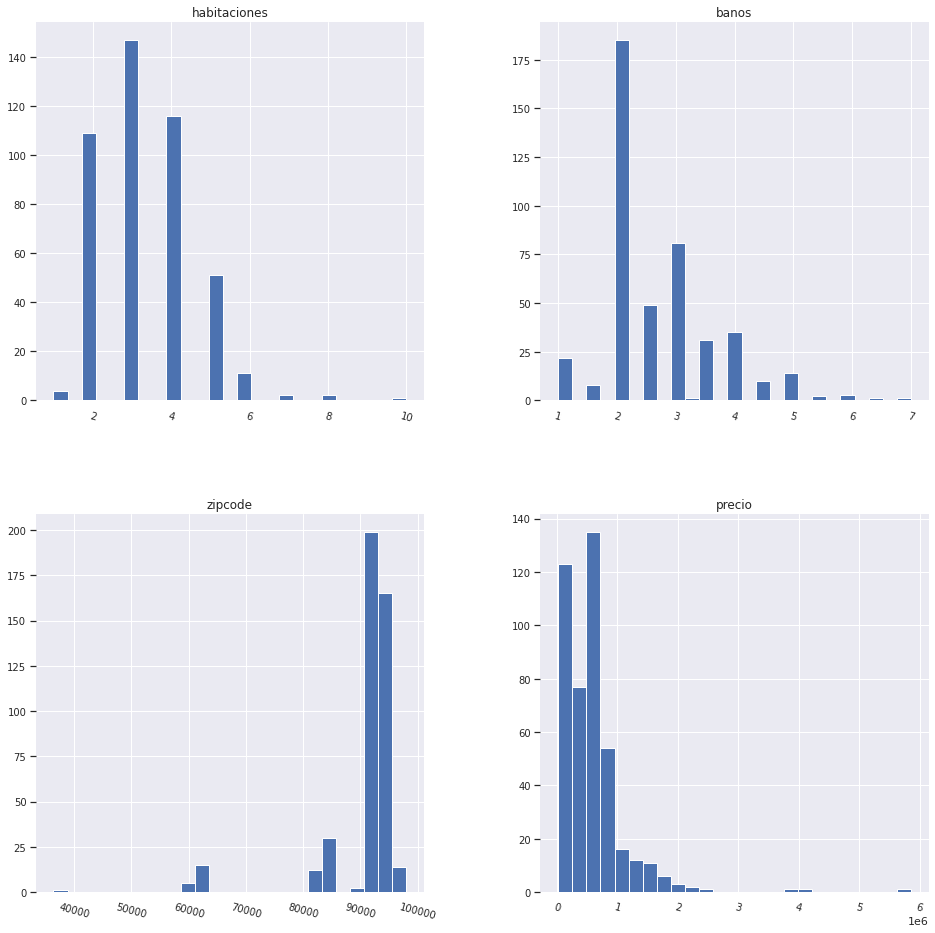

In [ ]:
df1=data_train[['cod_casa','habitaciones','banos','zipcode','precio']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

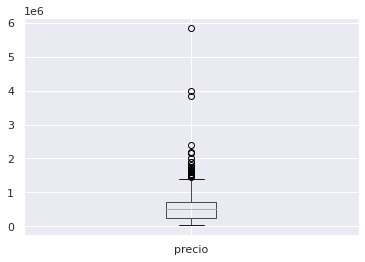

In [ ]:
data_train.boxplot(column=['precio'])

In [ ]:
df2 = data_train.copy() #creamos una copia del dataframe para trabajar los outliers

In [ ]:
for x in ['precio']:
    print(x)
    q75,q25 = np.percentile(df2.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df2.loc[df2[x] < min,x] = np.nan
    df2.loc[df2[x] > max,x] = np.nan

precio


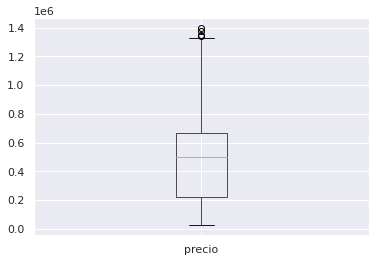

In [ ]:
df2.boxplot(column=['precio'])

In [ ]:
df2.isnull().sum()

Unnamed: 0       0
cod_casa         0
habitaciones     0
banos            0
area             0
zipcode          0
precio          26
dtype: int64

In [ ]:
df2 = df2.dropna()
df2.isnull().sum()

Unnamed: 0      0
cod_casa        0
habitaciones    0
banos           0
area            0
zipcode         0
precio          0
dtype: int64

[]

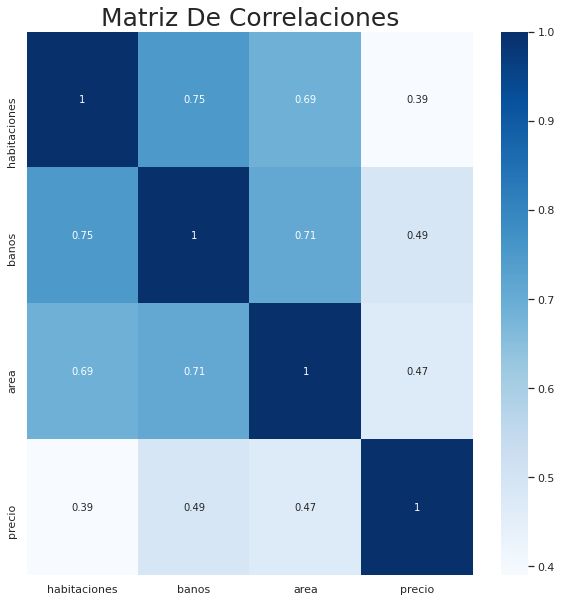

In [ ]:
df3 = data_train[['habitaciones','banos','area','precio']]
fig = plt.figure(figsize=(10,10))
sns.heatmap(data=df3.corr().round(2).abs(), annot=True, cmap=plt.cm.Blues)
plt.title('Matriz De Correlaciones',fontsize=25)
plt.plot()

In [ ]:
Y_1 = data_train[["precio"]]
X_1 = data_train[['habitaciones', 'banos', 'area']]

X_2 Y_2 corresponden a los x e y que provienen del dataframe son outliers, los ocupamos para probar como se comporta la red y si mejora su rendimiento

In [ ]:
Y_2 = df2[["precio"]]
X_2 = df2[['habitaciones', 'banos', 'area']]

In [ ]:
X_1.head()

,habitaciones,banos,area
0,4,4.0,4053
1,4,3.0,3343
2,3,4.0,3923
3,5,5.0,4022
4,3,4.0,4116


In [ ]:
Y_1.head()

,precio
0,869500
1,865200
2,889000
3,910000
4,971226


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_1, Y_1, test_size=_validation_split, random_state=0)

In [ ]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_2, Y_2, test_size=_validation_split, random_state=0)

In [ ]:
scaler = StandardScaler() # Standardize features by removing the mean and scaling to unit variance

scaler.fit(X_train)

X_train= scaler.transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
scaler2 = StandardScaler() # Standardize features by removing the mean and scaling to unit variance

scaler2.fit(X_train2)

X_train2 = scaler.transform(X_train2)
X_val2 = scaler.transform(X_val2)

In [ ]:
print(X_train)
print(y_train)

[[-0.30471974 -0.6592475  -0.51052259]
 [ 1.4492768   0.35873991  0.12225822]
 [-0.30471974  0.35873991 -0.36437665]
 ...
 [-0.30471974 -0.15025379 -0.18480372]
 [-0.30471974  0.35873991  0.36790777]
 [ 1.4492768   1.88572103  2.05014077]]
      precio
74    529000
26    789000
45    449000
390   175000
154   549000
..       ...
323    69900
192   568000
117   728000
47    535000
172  4000000

[354 rows x 1 columns]


In [ ]:
print("X,Y Shapes:       ", X_1.shape, Y_1.shape)
print("X,Y Train Shapes: ", X_train.shape, y_train.shape)
print("X,Y Val Shapes:   ", X_val.shape, y_val.shape)

X,Y Shapes:        (443, 3) (443, 1)
X,Y Train Shapes:  (354, 3) (354, 1)
X,Y Val Shapes:    (89, 3) (89, 1)


In [ ]:
print("X,Y Shapes:       ", X_2.shape, Y_2.shape)
print("X,Y Train Shapes: ", X_train2.shape, y_train2.shape)
print("X,Y Val Shapes:   ", X_val2.shape, y_val2.shape)

X,Y Shapes:        (417, 3) (417, 1)
X,Y Train Shapes:  (333, 3) (333, 1)
X,Y Val Shapes:    (84, 3) (84, 1)


Como se puede observar los X_2 y Y_2 tienen menos datos ya que removimos los outliers

In [ ]:
print("valores NaN")
print("X_train: " + str(np.any(np.isnan(X_train))))
print("X_val:   " + str(np.any(np.isnan(X_val))))
print("y_train: " + str(np.any(np.isnan(y_train))))
print("y_val:   " + str(np.any(np.isnan(y_val))))

valores NaN
X_train: False
X_val:   False
y_train: False
y_val:   False


Aca nostros trabajamos con 2 modelos, uno mixto que combina redes CNN y Feedforward para trabar con las imagenes provistas mas los datos y otro modelo solo FeedForward para trabajar solo los datos, de hecho construimos en un incio solo el modelo feedforward pero no logramos obtener tan buenos resultados y por eso procedimos a construir el modelo mixto, como no sabiamos como iba a resultar optamos por dejar los dos modelos, al final los resultados que se obtienen en este jupyter fueron hechos con el modelo mixto

MODELO MIXTO

*   CNN para procesar imagenes
*   FeedForward para procesar los datos

vamos a entrenar a este modelo con los X e Y originales, ya que al eliminar outliers tambien deberiamos eliminar las fotos correspondientes, pero como solo vamos a probar, los datos con outliers eliminados seran utilizados en el modelo FeedForward


n_features:  3
n_classes:  1
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ImageBathroom (InputLayer)      [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
ImageBedroom (InputLayer)       [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
ImageKitchen (InputLayer)       [(None, 100, 100, 1) 0                                            
__________________________________________________________________________________________________
ImageFrontal (InputLayer)       [(None, 100, 100, 1) 0                                            
_______________________________________________________________

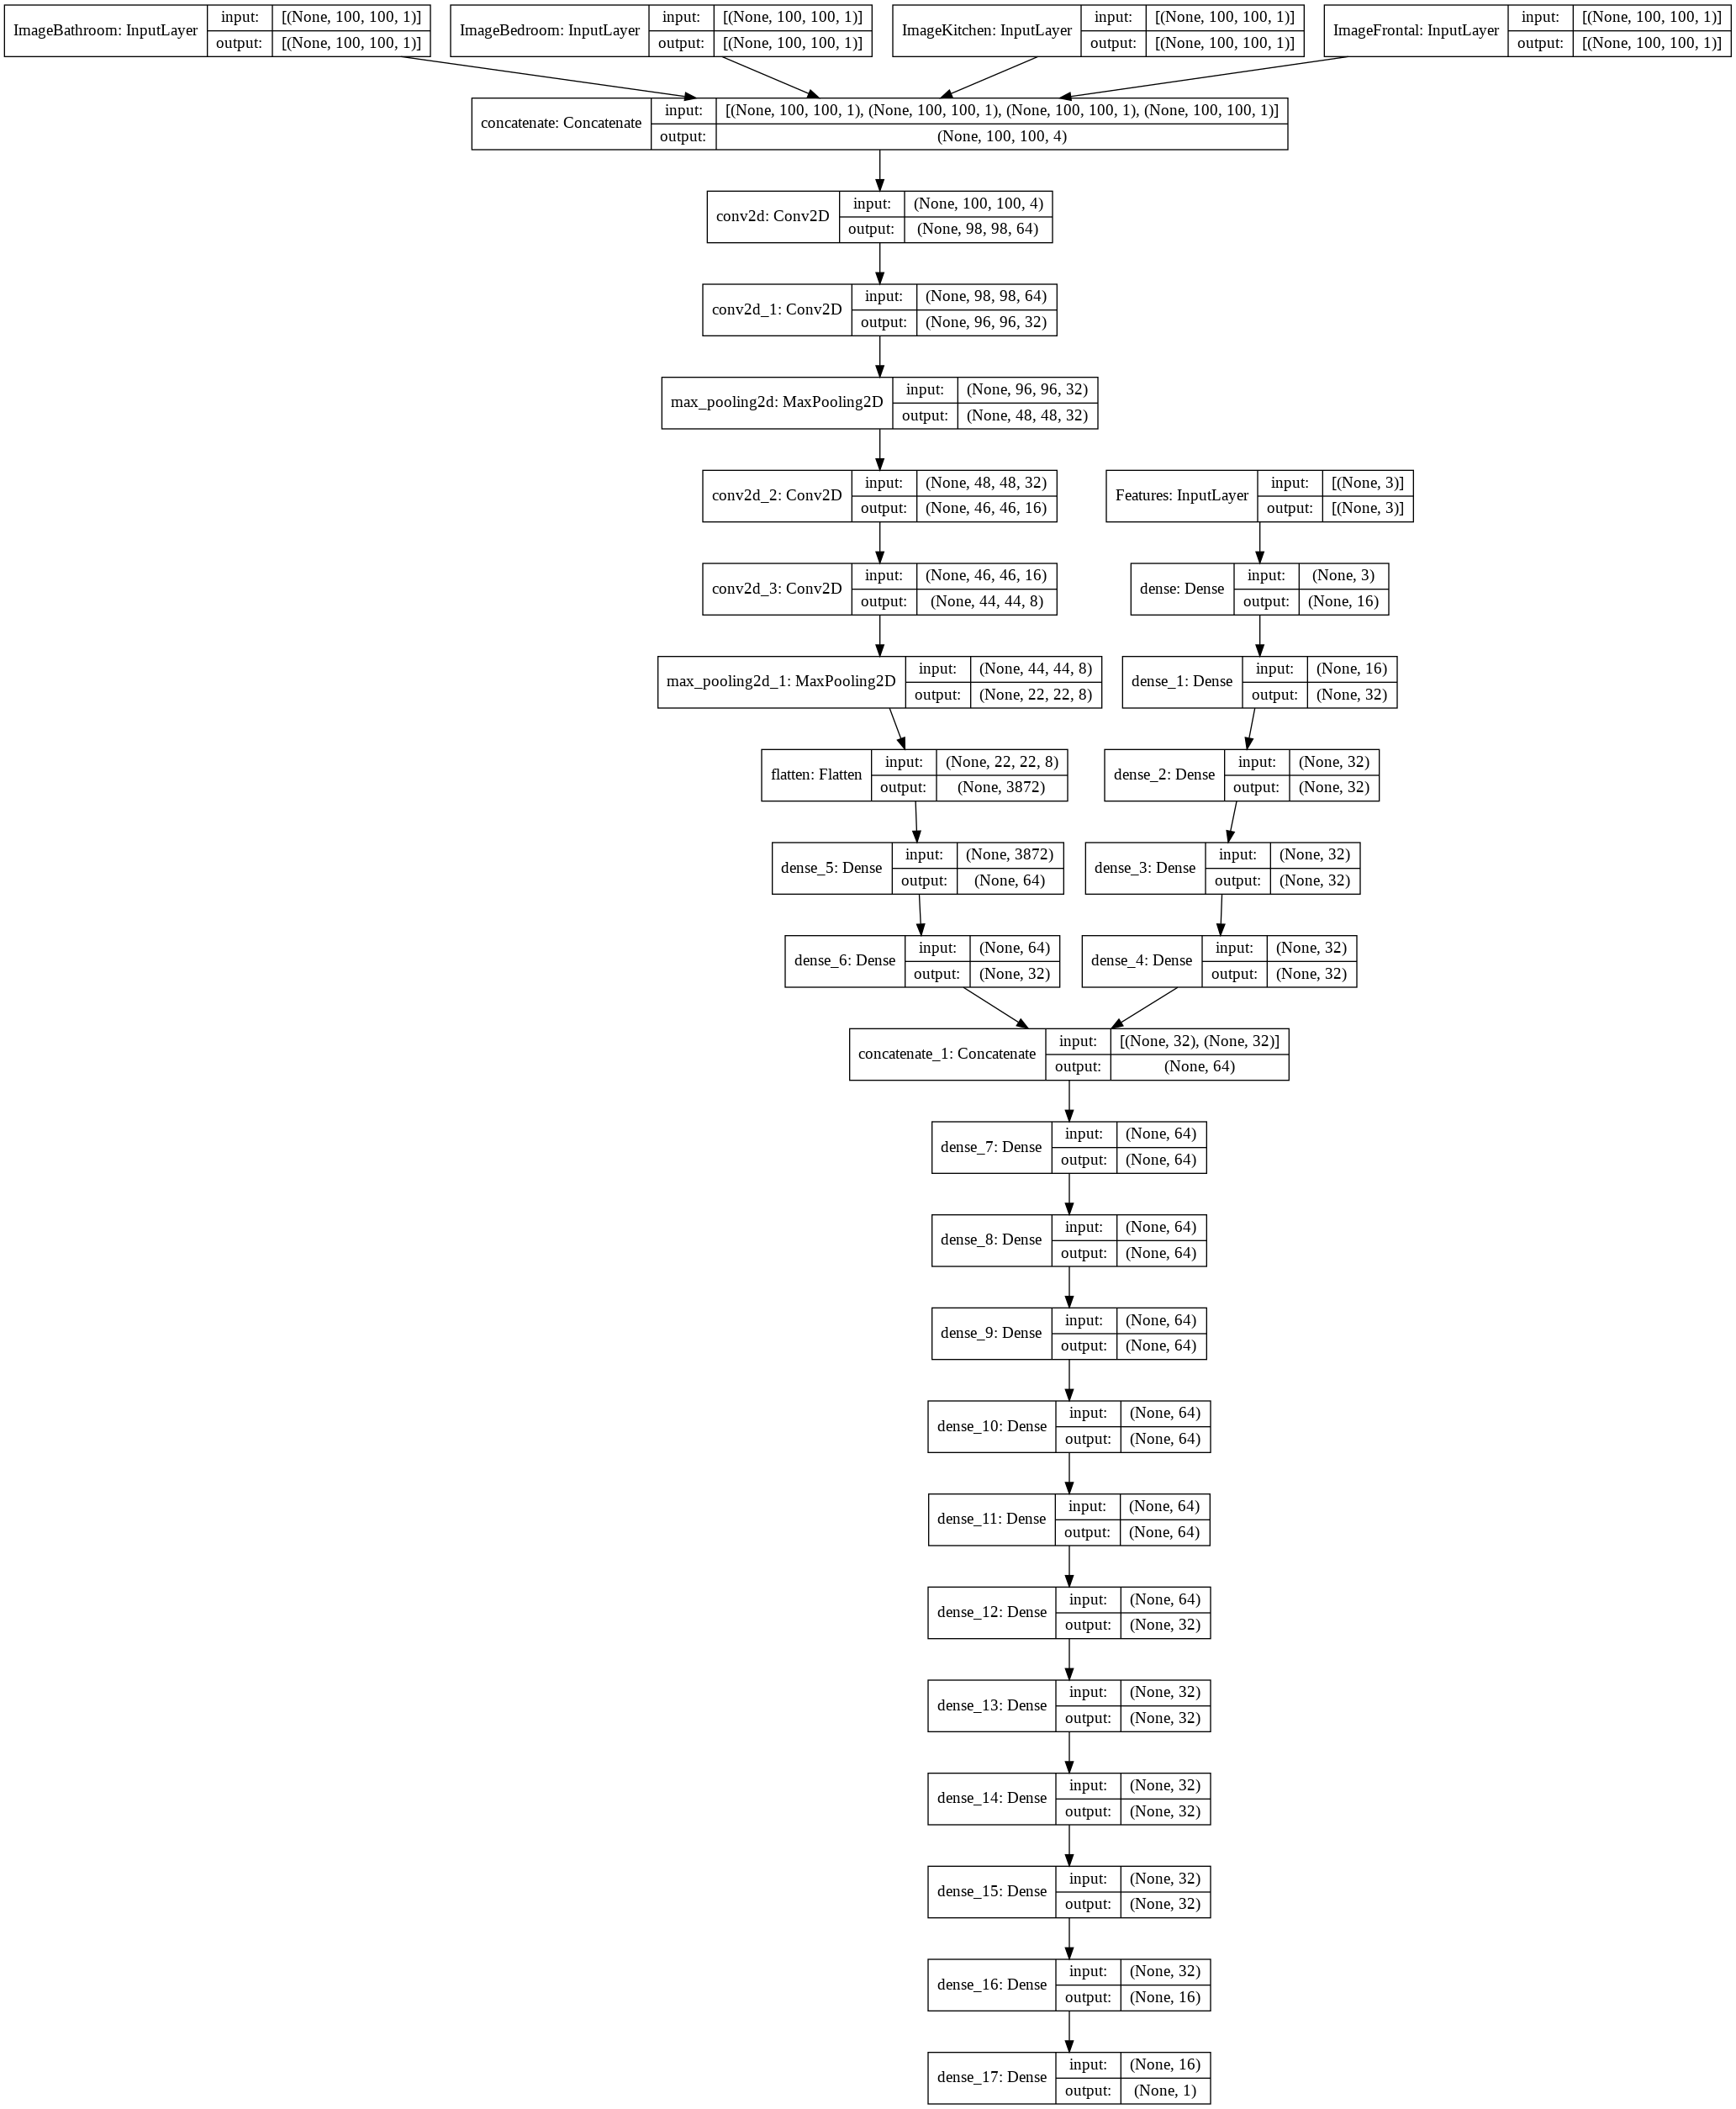

In [ ]:
n_features = X_train.shape[1]
n_classes = y_train.shape[1]

print("n_features: ", n_features)
print("n_classes: ", n_classes)

# definir ambos inputs
inputs_features = layers.Input(shape=( n_features ),name='Features' ) # 4 unidades 
input_image1 = layers.Input(shape=(100,100,1), name='ImageBathroom')
input_image2 = layers.Input(shape=(100,100,1), name='ImageBedroom')
input_image3 = layers.Input(shape=(100,100,1), name='ImageKitchen') 
input_image4 = layers.Input(shape=(100,100,1), name='ImageFrontal')

inputs = [inputs_features, input_image1, input_image2, input_image3, input_image4]

#primera rama que opera los datos del dataframe train
x = layers.Dense(16, activation='relu')(inputs_features)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = keras.Model(inputs=inputs_features, outputs=x)

# la segunda rama opera en el input de imagenes
y = layers.Concatenate()([input_image1, input_image2, input_image3, input_image4])
y = layers.Conv2D(filters = 64, kernel_size = 3, strides=(1, 1), activation ='relu')(y)    
y = layers.Conv2D(filters = 32, kernel_size = 3, strides=(1, 1), activation ='relu')(y)
y = layers.MaxPooling2D(pool_size=(49, 49), strides=(1, 1), padding='valid')(y)
y = layers.Conv2D(filters = 16, kernel_size = 3, strides=(1, 1), activation ='relu')(y)    
y = layers.Conv2D(filters = 8, kernel_size = 3, strides=(1, 1), activation ='relu')(y)    
y = layers.MaxPooling2D(pool_size=(23, 23), strides=(1, 1), padding='valid')(y) 
y = layers.Flatten()(y)
y = layers.Dense(64, activation='relu')(y)
y = layers.Dense(32, activation='relu')(y)
y = keras.Model(inputs=[input_image1, input_image2, input_image3, input_image4], outputs=y)

# combinar el output de ambas ramas 
combined = layers.concatenate([x.output, y.output])

z = layers.Dense(64, activation="relu")(combined)
z = layers.Dense(64, activation="relu")(z)
z = layers.Dense(64, activation="relu")(z)
z = layers.Dense(64, activation="relu")(z)
z = layers.Dense(64, activation="relu")(z)
z = layers.Dense(32, activation="relu")(z)
z = layers.Dense(32, activation="relu")(z)
z = layers.Dense(32, activation="relu")(z)
z = layers.Dense(32, activation="relu")(z)
z = layers.Dense(16, activation="relu")(z)


z = layers.Dense(n_classes, activation="linear")(z)
model3 = keras.Model(inputs=inputs, outputs=z)

model3.summary()
keras.utils.plot_model(model3, show_shapes=True)

Ejemplos de entrenamiento: 354
Epoch 1/40
12/12 - 31s - loss: 630726852608.0000 - val_loss: 535057596416.0000
Epoch 2/40
12/12 - 1s - loss: 471044620288.0000 - val_loss: 229269028864.0000
Epoch 3/40
12/12 - 1s - loss: 383575556096.0000 - val_loss: 296160591872.0000
Epoch 4/40
12/12 - 1s - loss: 323368910848.0000 - val_loss: 241279074304.0000
Epoch 5/40
12/12 - 1s - loss: 318616469504.0000 - val_loss: 219709652992.0000
Epoch 6/40
12/12 - 1s - loss: 308026802176.0000 - val_loss: 214053634048.0000
Epoch 7/40
12/12 - 1s - loss: 312146526208.0000 - val_loss: 214040559616.0000
Epoch 8/40
12/12 - 1s - loss: 311515873280.0000 - val_loss: 225952432128.0000
Epoch 9/40
12/12 - 1s - loss: 310379151360.0000 - val_loss: 236832784384.0000
Epoch 10/40
12/12 - 1s - loss: 314081542144.0000 - val_loss: 217584517120.0000
Epoch 11/40
12/12 - 1s - loss: 305212882944.0000 - val_loss: 219722039296.0000
Epoch 12/40
12/12 - 1s - loss: 306454331392.0000 - val_loss: 228096311296.0000
Epoch 13/40
12/12 - 1s - loss

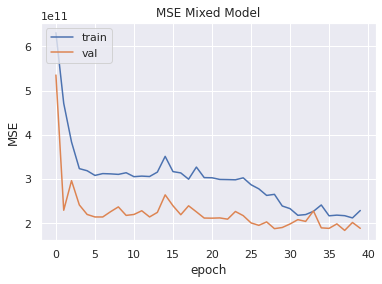

In [ ]:
opti=keras.optimizers.Adam(amsgrad=True)

# Compilar el modelo.  utilizando mean squared error
model3.compile(loss='mse', optimizer=opti)
  
_batch_size = 32 # Numero de ejemplos por gradient update.
          
print("Ejemplos de entrenamiento: {n_t}".format(n_t = X_train.shape[0] ) )

  # Entrenar modelo
history = model3.fit(
    x = [X_train, XT_bath, XT_bed, XT_k, XT_f],
    y = y_train,
    batch_size=_batch_size,
    epochs=40,
    verbose=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=([X_val, XV_bath, XV_bed, XV_k, XV_f], y_val),
 )

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MSE Mixed Model')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

MODELO FEEDFORWARD


n_features:  3
n_classes:  1
Model: "Regression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Inputs (InputLayer)          [(None, 3)]               0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                64        
_________________________________________________________________
dense_25 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_26 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_29 (Dense)           

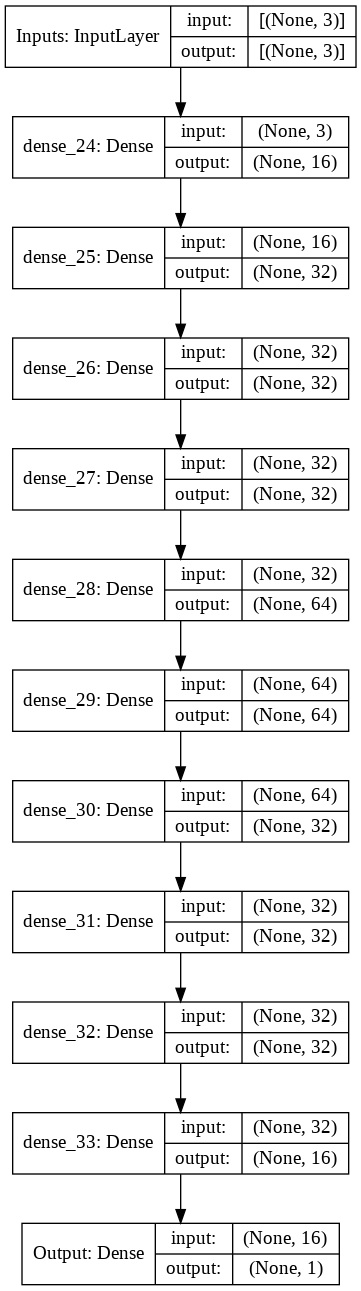

In [ ]:
n_features = X_train2.shape[1]
n_classes = y_train2.shape[1]

print("n_features: ", n_features)
print("n_classes: ", n_classes)

inputs = keras.Input(shape=(n_features, ), name='Inputs')
x = layers.Dense(16, activation='relu')(inputs)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dense(16, activation='relu')(x)

outputs = layers.Dense(n_classes, activation='linear', name='Output')(x)
 
model = keras.Model(inputs=inputs, outputs=outputs, name='Regression')
model.summary()

keras.utils.plot_model(model, show_shapes=True)


Ejemplos de entrenamiento: 333
Epoch 1/100
11/11 - 1s - loss: 326567264256.0000 - val_loss: 342615195648.0000
Epoch 2/100
11/11 - 0s - loss: 326566608896.0000 - val_loss: 342613819392.0000
Epoch 3/100
11/11 - 0s - loss: 326563201024.0000 - val_loss: 342606282752.0000
Epoch 4/100
11/11 - 0s - loss: 326545309696.0000 - val_loss: 342563160064.0000
Epoch 5/100
11/11 - 0s - loss: 326436978688.0000 - val_loss: 342313140224.0000
Epoch 6/100
11/11 - 0s - loss: 325799542784.0000 - val_loss: 340920532992.0000
Epoch 7/100
11/11 - 0s - loss: 322506260480.0000 - val_loss: 333814202368.0000
Epoch 8/100
11/11 - 0s - loss: 307144589312.0000 - val_loss: 303301492736.0000
Epoch 9/100
11/11 - 0s - loss: 249337266176.0000 - val_loss: 208568664064.0000
Epoch 10/100
11/11 - 0s - loss: 157070753792.0000 - val_loss: 145834229760.0000
Epoch 11/100
11/11 - 0s - loss: 124197822464.0000 - val_loss: 120070692864.0000
Epoch 12/100
11/11 - 0s - loss: 109187825664.0000 - val_loss: 106949263360.0000
Epoch 13/100
11/11

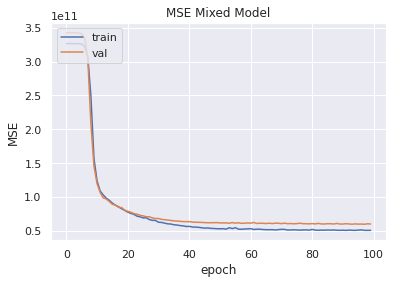

In [ ]:
# Compilar el modelo.  utilizando mean squared error
model.compile(loss='mse', optimizer='adam')
  
_batch_size = 32 # Numero de ejemplos por gradient update.
          
print("Ejemplos de entrenamiento: {n_t}".format(n_t = X_train2.shape[0] ) )

  # Entrenar modelo
history = model.fit(
    x = X_train2,
    y = y_train2,
    batch_size=_batch_size,
    epochs=100,
    verbose=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(X_val2, y_val2),
 )

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MSE Mixed Model')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
data_test = pd.read_csv('metadata_casas_test.csv')

In [ ]:
X_test = data_test[['habitaciones', 'banos', 'area']]
X_test

,habitaciones,banos,area
0,4,5.0,4581
1,5,4.0,4190
2,6,6.5,5963
3,4,4.0,4464
4,3,4.5,3893
...,...,...,...
87,4,4.0,2681
88,4,2.5,2422
89,4,2.0,2334
90,3,2.0,2014


In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
predictions = model3.predict([X_test, Xt_bath, Xt_bed, Xt_k, Xt_f])
predictions

array([[1128390.2 ],
       [ 984624.4 ],
       [1579334.6 ],
       [ 878319.7 ],
       [ 881659.9 ],
       [ 668910.56],
       [ 580150.2 ],
       [ 794645.56],
       [ 271012.22],
       [ 593366.94],
       [ 549744.8 ],
       [1107191.2 ],
       [ 583294.56],
       [1065995.9 ],
       [ 313647.9 ],
       [ 510775.7 ],
       [ 792802.8 ],
       [ 353466.8 ],
       [ 265854.97],
       [ 954742.2 ],
       [ 431876.88],
       [ 772577.75],
       [ 575580.56],
       [1006019.1 ],
       [ 860818.1 ],
       [ 716128.94],
       [ 426685.2 ],
       [ 203194.56],
       [ 311206.44],
       [ 318328.2 ],
       [ 974646.75],
       [ 431692.78],
       [ 354963.28],
       [ 512855.44],
       [ 607201.8 ],
       [ 304383.4 ],
       [ 306590.97],
       [ 451588.6 ],
       [ 283861.6 ],
       [ 361874.7 ],
       [ 373118.7 ],
       [ 245629.34],
       [ 648559.06],
       [ 402893.3 ],
       [ 467258.44],
       [1202028.6 ],
       [ 622678.5 ],
       [ 4826

In [ ]:
predictions2 = model.predict(X_test)
predictions2

array([[1002623.6 ],
       [ 686913.  ],
       [1129317.1 ],
       [ 810002.7 ],
       [ 974634.75],
       [ 725998.2 ],
       [ 632061.7 ],
       [ 579718.2 ],
       [ 531323.75],
       [ 589214.5 ],
       [ 616026.2 ],
       [ 793326.9 ],
       [ 586457.94],
       [ 602086.75],
       [ 469863.44],
       [ 623197.25],
       [ 579316.94],
       [ 482498.16],
       [ 343178.34],
       [ 788009.6 ],
       [ 586736.1 ],
       [ 844032.44],
       [ 625247.56],
       [ 866361.7 ],
       [ 606269.4 ],
       [ 646785.  ],
       [ 562779.7 ],
       [ 239123.67],
       [ 344918.75],
       [ 479549.75],
       [ 878921.  ],
       [ 569376.5 ],
       [ 565722.56],
       [ 559288.06],
       [ 633647.5 ],
       [ 375397.22],
       [ 402456.12],
       [ 555118.44],
       [ 366092.72],
       [ 481023.9 ],
       [ 479107.47],
       [ 239584.22],
       [ 720416.3 ],
       [ 482940.38],
       [ 570429.1 ],
       [ 883093.25],
       [ 643226.4 ],
       [ 5722

In [ ]:
ids = data_test[['Unnamed: 0']].to_numpy().flatten()
submission = pd.DataFrame(list(zip(ids, predictions2.flatten())), columns=['id', 'value']) #predictions 2 es con los datos de outliers eliminados, predictions son los datos de la red mixta

In [ ]:
submission.to_csv('submission.csv', index=False)